In [1]:
import numpy as np
import baggage_script as bs
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from pyheatmap.heatmap import HeatMap

## 导入需要分析的数据并处理

- 导入数据
- 提取分析点
- 将分析点周围的数据进行统计
- 重新排布(sort)
- 将结果保存下来

In [3]:
filePath='/Volumes/HaoZsData1/WorkSpace/ele_ana_new/ana_workspace/V1_5.txt'
data = bs.txt_read_pandas(filePath)

In [4]:
index_list_del = bs.data_raise(data, 1, threshold = 2, delay = 4)

100%|██████████| 9000000/9000000 [00:18<00:00, 486444.07it/s]


In [5]:
a = 1
while a > 0:
    if len(index_list_del) != 16:
        index_list_del.pop(0)
    else:
        a = 0

In [68]:
# 从data_raise点获取数据, 得到16*16矩阵, 第一列为通道1
sum_array = np.empty([16,16])
for a in range(15):
    for index in range(len(index_list_del)):
        # 先看列, 再看行
        R = index_list_del[index]
        sum_array[index,a] = np.sum(data[R:R+30000,a+1])
        if np.sum(data[R:R+30000,a+1]) >= 1:
            sum_array[index,a] = np.sum(data[R:R+30000,a+1])
        else:
            sum_array[index,a] = 0
sum_array[:,0] = 0

In [69]:
# 解决一一对应关系
List_token = [15,16,14,7,13,6,12,5,11,4,10,3,9,2,8,1]
data_sort = np.empty([16,16])
for index in range(16):
    R = List_token[index]
    data_sort[:,index]=sum_array[:,R-1]

In [50]:
print(data_sort)

[[  8.90000000e+001   3.20398055e+097   8.70000000e+001   1.40000000e+001
    9.00000000e+001   4.00000000e+000   8.90000000e+001   6.10000000e+001
    9.60000000e+001   7.00000000e+000   9.40000000e+001   7.40000000e+001
    6.20000000e+001   8.00000000e+000   9.00000000e+000   6.72113443e+004]
 [  2.00000000e+000   2.13582311e-314   1.00000000e+000   2.00000000e+000
    3.00000000e+000   1.20000000e+001   1.00000000e+000   5.00000000e+000
    2.00000000e+000   3.90000000e+001   2.00000000e+000   4.00000000e+000
    3.00000000e+000   6.80000000e+001   4.40000000e+001   6.67141630e+004]
 [  2.00000000e+000   2.19260741e-314   0.00000000e+000   1.10000000e+001
    1.00000000e+000   2.00000000e+000   1.00000000e+000   1.30000000e+001
    2.00000000e+000   4.00000000e+000   0.00000000e+000   2.20000000e+001
    1.50000000e+001   5.00000000e+000   5.00000000e+000   6.64719303e+004]
 [  5.00000000e+000   2.49811708e+038   2.00000000e+000   2.00000000e+000
    3.00000000e+000   0.00000000e+0

In [70]:
# 保存结果
filename = '/Volumes/HaoZsData1/WorkSpace/ele_ana_new/ana_workspace/token/V1_5_sort.csv'
bs.save2csv(data_sort, filename)

## 导出后的第1列结果很奇怪, 有nan, 有奇怪的地方

## 对数据进行可视化分析

- [ ] 将数据在x和y轴处展示(加入实际的电极方向), 获得x和y上的点
- [ ] 然后将点画出

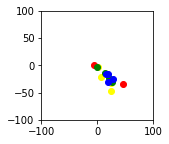

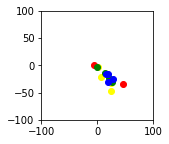

In [86]:
plt.figure(figsize=(2,2))
for i in range(4):
    x=(np.sum(data_sort[i,:]*np.array([-2,-1,1,2,-2,-1,1,2,-2,-1,1,2,-2,-1,1,2])))
    y=(np.sum(data_sort[i,:]*np.array([2,2,2,2,1,1,1,1,-1,-1,-1,-1,-2,-2,-2,-2])))
    plt.plot(x,y, 'red', label = 'LED1',marker = 'o')
for i in range(4):
    x=(np.sum(data_sort[i+4,:]*np.array([-2,-1,1,2,-2,-1,1,2,-2,-1,1,2,-2,-1,1,2])))
    y=(np.sum(data_sort[i+4,:]*np.array([2,2,2,2,1,1,1,1,-1,-1,-1,-1,-2,-2,-2,-2])))
    plt.plot(x,y, 'yellow', label = 'LED2',marker = 'o')
for i in range(4):
    x=(np.sum(data_sort[i+8,:]*np.array([-2,-1,1,2,-2,-1,1,2,-2,-1,1,2,-2,-1,1,2])))
    y=(np.sum(data_sort[i+8,:]*np.array([2,2,2,2,1,1,1,1,-1,-1,-1,-1,-2,-2,-2,-2])))
    plt.plot(x,y, 'green', label = 'LED3',marker = 'o')
for i in range(4):
    x=(np.sum(data_sort[i+12,:]*np.array([-2,-1,1,2,-2,-1,1,2,-2,-1,1,2,-2,-1,1,2])))
    y=(np.sum(data_sort[i+12,:]*np.array([2,2,2,2,1,1,1,1,-1,-1,-1,-1,-2,-2,-2,-2])))
    plt.plot(x,y, 'blue', label = 'LED4',marker = 'o')
plt.xlim(-100,100)
plt.ylim(-100,100)
#plt.legend()    
plt_filename='/Volumes/HaoZsData1/WorkSpace/ele_ana_new/ana_workspace/token/V1_5_sort.png'
plt.savefig(plt_filename, dpi = 300, bbox_inches = 'tight')

# other

In [207]:
mean_list=[]
for i_1 in range(4):
    raw_token = []
    for i_2 in range(16):
        raw_token.append(np.mean(data_sort_A[i_1*4:i_1*4+4,i_2]))
    mean_list.append(raw_token)
mean_array=np.array(mean_list)
print(np.sum(mean_array[0,:]*np.array([-2,-1,1,2,-2,-1,1,2,-2,-1,1,2,-2,-1,1,2])))

-4.75


In [209]:
derection_a = bs.data_derection(mean_array)
print(np.shape(derection_a))


ValueError: operands could not be broadcast together with shapes (4,) (16,) 

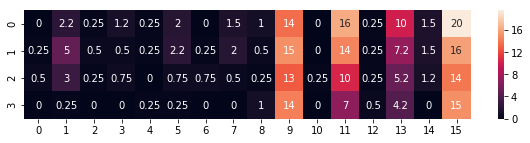

In [9]:
plt.figure(figsize=(10,2))
sns.heatmap(mean_array,annot=True)
plt.show()

In [14]:
a = np.array([[1,2,3,4],[5,6,7,8]])
b = np.array([[1,2,3,4],[5,6,7,8]])
c = a*b
print(c)

[[ 1  4  9 16]
 [25 36 49 64]]


In [ ]:
# 循环处理所有方向结果并绘图
for ia in tqdm(range(1,4)):
    for ib in range(1,6):
        filePath = '/Users/zhenghao/Desktop/ele_ana_new/ana_workspace/V{}_{}.txt'.format(ia, ib)
        data = bs.txt_read_pandas(filePath)
        index_list_del = bs.data_raise(data, 1, threshold = 2, delay = 4)
        
        # count the times of firing
        sum_list=[]
        for index_1 in index_list_del:
            raw_token = []
            for i_1 in range(1,17):
                raw_token.append(np.sum(data[index_1:index_1+30000,i_1]))
            sum_list.append(raw_token)
            sum_array = np.array(sum_list)
            
        # 解决一一对应关系
        data_sort=[]
        for i in range(16):
            data_sort.append(bs.Sort_Channel(sum_array[i,:]))
        data_sort_A=np.array(data_sort)
        
        # 求方向
        a = bs.data_derection(data_sort_A)
        hm = HeatMap(a)
        hm.clickmap(save_as="hit.png")
        hm.heatmap(save_as="heat.png")
        

In [134]:
a = np.array(range(10))
b = a.reshape(2,5)
b[0,0]=100
print(np.shape(b))
c=np.sum(b)
print(c)

(2, 5)
145


In [24]:
List_token = [15,16,14,7,13,6,12,5,11,4,10,3,9,2,8,1]
data_sort = np.empty([16,16])
for index in range(16):
    R = List_token[index]
    data_sort[:,index]=sum_array[:,R-1]
print(data_sort)

[[  8.90000000e+001               nan   8.70000000e+001   1.40000000e+001
    9.00000000e+001   4.00000000e+000   8.90000000e+001   6.10000000e+001
    9.60000000e+001   7.00000000e+000   9.40000000e+001   7.40000000e+001
    6.20000000e+001   8.00000000e+000   9.00000000e+000   6.72113443e+004]
 [  2.00000000e+000   0.00000000e+000   1.00000000e+000   2.00000000e+000
    3.00000000e+000   1.20000000e+001   1.00000000e+000   5.00000000e+000
    2.00000000e+000   3.90000000e+001   2.00000000e+000   4.00000000e+000
    3.00000000e+000   6.80000000e+001   4.40000000e+001   6.67141630e+004]
 [  2.00000000e+000   2.39109482e-314   0.00000000e+000   1.10000000e+001
    1.00000000e+000   2.00000000e+000   1.00000000e+000   1.30000000e+001
    2.00000000e+000   4.00000000e+000   0.00000000e+000   2.20000000e+001
    1.50000000e+001   5.00000000e+000   5.00000000e+000   6.64719303e+004]
 [  5.00000000e+000   2.39109482e-314   2.00000000e+000   2.00000000e+000
    3.00000000e+000   0.00000000e+0